## Регрессия на imdb

In [101]:
# ячейка импортов
import pandas as pd
import numpy as np

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# место для импорта регрессионных моделей
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, RidgeCV
from sklearn.svm import LinearSVR

The scikit-learn version is 0.24.1.


In [2]:
! unzip "imdb.zip" 

Archive:  imdb.zip
  inflating: IMDB-Movie-Data.csv     


In [4]:
data = pd.read_csv('IMDB-Movie-Data.csv') # замените на актуальный путь

data.head(10)

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0
5,6,The Great Wall,"Action,Adventure,Fantasy",European mercenaries searching for black powde...,Yimou Zhang,"Matt Damon, Tian Jing, Willem Dafoe, Andy Lau",2016,103,6.1,56036,45.13,42.0
6,7,La La Land,"Comedy,Drama,Music",A jazz pianist falls for an aspiring actress i...,Damien Chazelle,"Ryan Gosling, Emma Stone, Rosemarie DeWitt, J....",2016,128,8.3,258682,151.06,93.0
7,8,Mindhorn,Comedy,A has-been actor best known for playing the ti...,Sean Foley,"Essie Davis, Andrea Riseborough, Julian Barrat...",2016,89,6.4,2490,NaN,71.0
8,9,The Lost City of Z,"Action,Adventure,Biography","A true-life drama, centering on British explor...",James Gray,"Charlie Hunnam, Robert Pattinson, Sienna Mille...",2016,141,7.1,7188,8.01,78.0
9,10,Passengers,"Adventure,Drama,Romance",A spacecraft traveling to a distant colony pla...,Morten Tyldum,"Jennifer Lawrence, Chris Pratt, Michael Sheen,...",2016,116,7.0,192177,100.01,41.0


## Регрессии:

В этом датасете для регрессии есть несколько опций, выбирайте то, что более интересно: 

- определить рейтинг по описанию фильма
- определить длительность фильма по году создания
- определить рейтинг по длине фильма
- Ваша идея

Шаги выполнения: 
- Определите, какие части датасета необходимы для вашей задачи
- Если работаете с текстовыми ячейками, векторизуйте тексты
- Разделите данные на обучающую и тестовую выборку
- Попробуйте обучить [разные регрессионные модели](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model) (не забудьте импортировать их в эту тетрадку)

- Для каждой модели посмотрите на метрики. 

Какая/какие модель/ли справляются с выбранной Вами задачей наиболее эффективно?

In [5]:
data.shape

(1000, 12)

In [6]:
data.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [7]:
data.rename({"Runtime (Minutes)": "runtime", "Revenue (Millions)": "revenue"}, axis=1, inplace=True)

In [8]:
data.describe()

,Rank,Year,runtime,Rating,Votes,revenue,Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [9]:
data.corr()

,Rank,Year,runtime,Rating,Votes,revenue,Metascore
Rank,1.000000,-0.261605,-0.221739,-0.219555,-0.283876,-0.271592,-0.191869
Year,-0.261605,1.000000,-0.164900,-0.211219,-0.411904,-0.126790,-0.079305
runtime,-0.221739,-0.164900,1.000000,0.392214,0.407062,0.267953,0.211978
Rating,-0.219555,-0.211219,0.392214,1.000000,0.511537,0.217654,0.631897
Votes,-0.283876,-0.411904,0.407062,0.511537,1.000000,0.639661,0.325684
revenue,-0.271592,-0.126790,0.267953,0.217654,0.639661,1.000000,0.142397
Metascore,-0.191869,-0.079305,0.211978,0.631897,0.325684,0.142397,1.000000


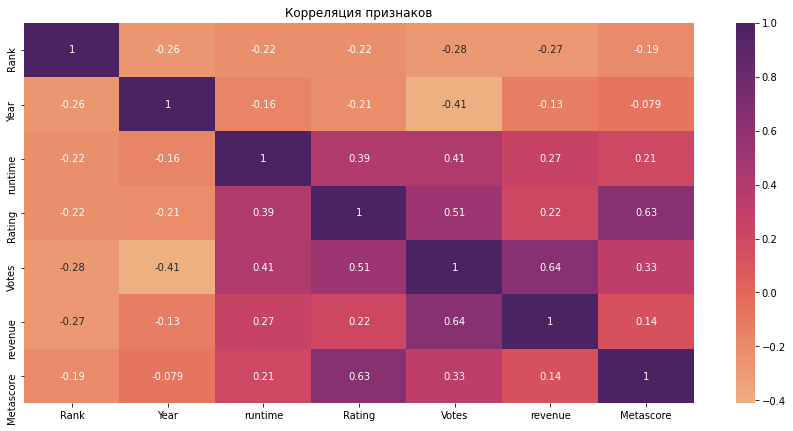

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,7))

sns.heatmap(data=data.corr(), annot=True, cmap= "flare") 

plt.title("Корреляция признаков") 
plt.show()

## Попробуем определить рейтинг по описанию фильма

In [11]:
# посмотрим на длины строк описаний
print (data.Description.str.len().sort_values())

580     42
633     55
524     56
962     57
108     58
      ... 
703    340
231    349
959    352
773    357
322    421
Name: Description, Length: 1000, dtype: int64


In [12]:
# посмотрим есть ли нулевой рейтинг
data[data["Rating"] == 0].shape

(0, 12)

In [13]:
data = data[["Rating", "Description"]]

In [14]:
data.head(3)

,Rating,Description
0,8.1,A group of intergalactic criminals are forced ...
1,7.0,"Following clues to the origin of mankind, a te..."
2,7.3,Three girls are kidnapped by a man with a diag...


In [ ]:
# векторизуем описания

In [117]:
from sklearn import feature_extraction
from sklearn.feature_extraction.text import CountVectorizer

f = feature_extraction.text.CountVectorizer(stop_words = 'english')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["Description"])

In [16]:
display(X, X.shape)

<1000x5897 sparse matrix of type '<class 'numpy.int64'>'
	with 24071 stored elements in Compressed Sparse Row format>

(1000, 5897)

In [113]:
y = data['Rating'].values

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Lasso

In [98]:
regressor = Lasso(alpha=0.04)
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)


print(mean_squared_error(y_test, preds))
print(r2_score(y_test, preds))

0.9601856733212982
0.006723765984001706


# LinearRegression

In [99]:
regressor = LinearRegression().fit(X_train, y_train)

preds = regressor.predict(X_test)
print(mean_squared_error(y_test, preds))
print(r2_score(y_test, preds))

1.0988132986634374
-0.13668133727496445


# ElasticNet

In [100]:
regressor = ElasticNet(alpha=0.02).fit(X_train, y_train)

preds = regressor.predict(X_test)
print(mean_squared_error(y_test, preds))
print(r2_score(y_test, preds))

0.9579883886752866
0.008996774922681472


# Ridge

In [109]:
#здесь и далее alpha подобрана для оптимальных метрик

regressor = Ridge(alpha=50.0) 
regressor.fit(X_train, y_train)
preds = regressor.predict(X_test)

print(mean_squared_error(y_test, preds))
print(r2_score(y_test, preds))

0.9385001322516724
0.029156648669837804


- лучший результат

Сделаем предсказание для своего описания

In [115]:
desc = """A lonely, desperate man who has just been diagnosed with gastritis tries to open his own bakery and provide for his imaginary family, but something keeps getting in his way.
 Mystery, drama, battle action, detective, and dark comedy all packed in one mind-boggling adventure that keeps the viewer at the edge of their seat for the duration of the movie, 
 which is 72 hours."""

In [118]:
X_new = vectorizer.transform([desc])

In [119]:
regressor.predict(X_new)

array([7.71014246])

Сделаем предсказание для реального описания


In [121]:
# Serenity, реальный рейтинг - 7.5
desc = """The crew of the ship Serenity try to evade an assassin sent to recapture telepath River."""
X_new = vectorizer.transform([desc])
regressor.predict(X_new)

array([6.61984419])

In [125]:
# Casablanca, реальный рейтинг - 8.5
desc = """A cynical expatriate American cafe owner struggles to decide whether or not to help his former lover and her fugitive husband escape the Nazis in French Morocco."""
X_new = vectorizer.transform([desc])
regressor.predict(X_new)

array([6.98356826])

In [123]:
# The Room, реальный рейтинг - 3.7
desc = """Johnny is a successful bank executive who lives quietly in a San Francisco townhouse with his fiancée, Lisa. 
One day, putting aside any scruple, she seduces Johnny's best friend, Mark. From there, nothing will be the same again."""
X_new = vectorizer.transform([desc])
regressor.predict(X_new)

array([6.92222591])

Cистема работает не очень хорошо, что было видно из метрик